In [1]:
import re
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
from bs4 import BeautifulSoup 
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

eng_stopwords = set(stopwords.words("english"))
NB =GaussianNB()

# نقشه راه

## https://www.kaggle.com/c/word2vec-nlp-tutorial/overview/evaluation

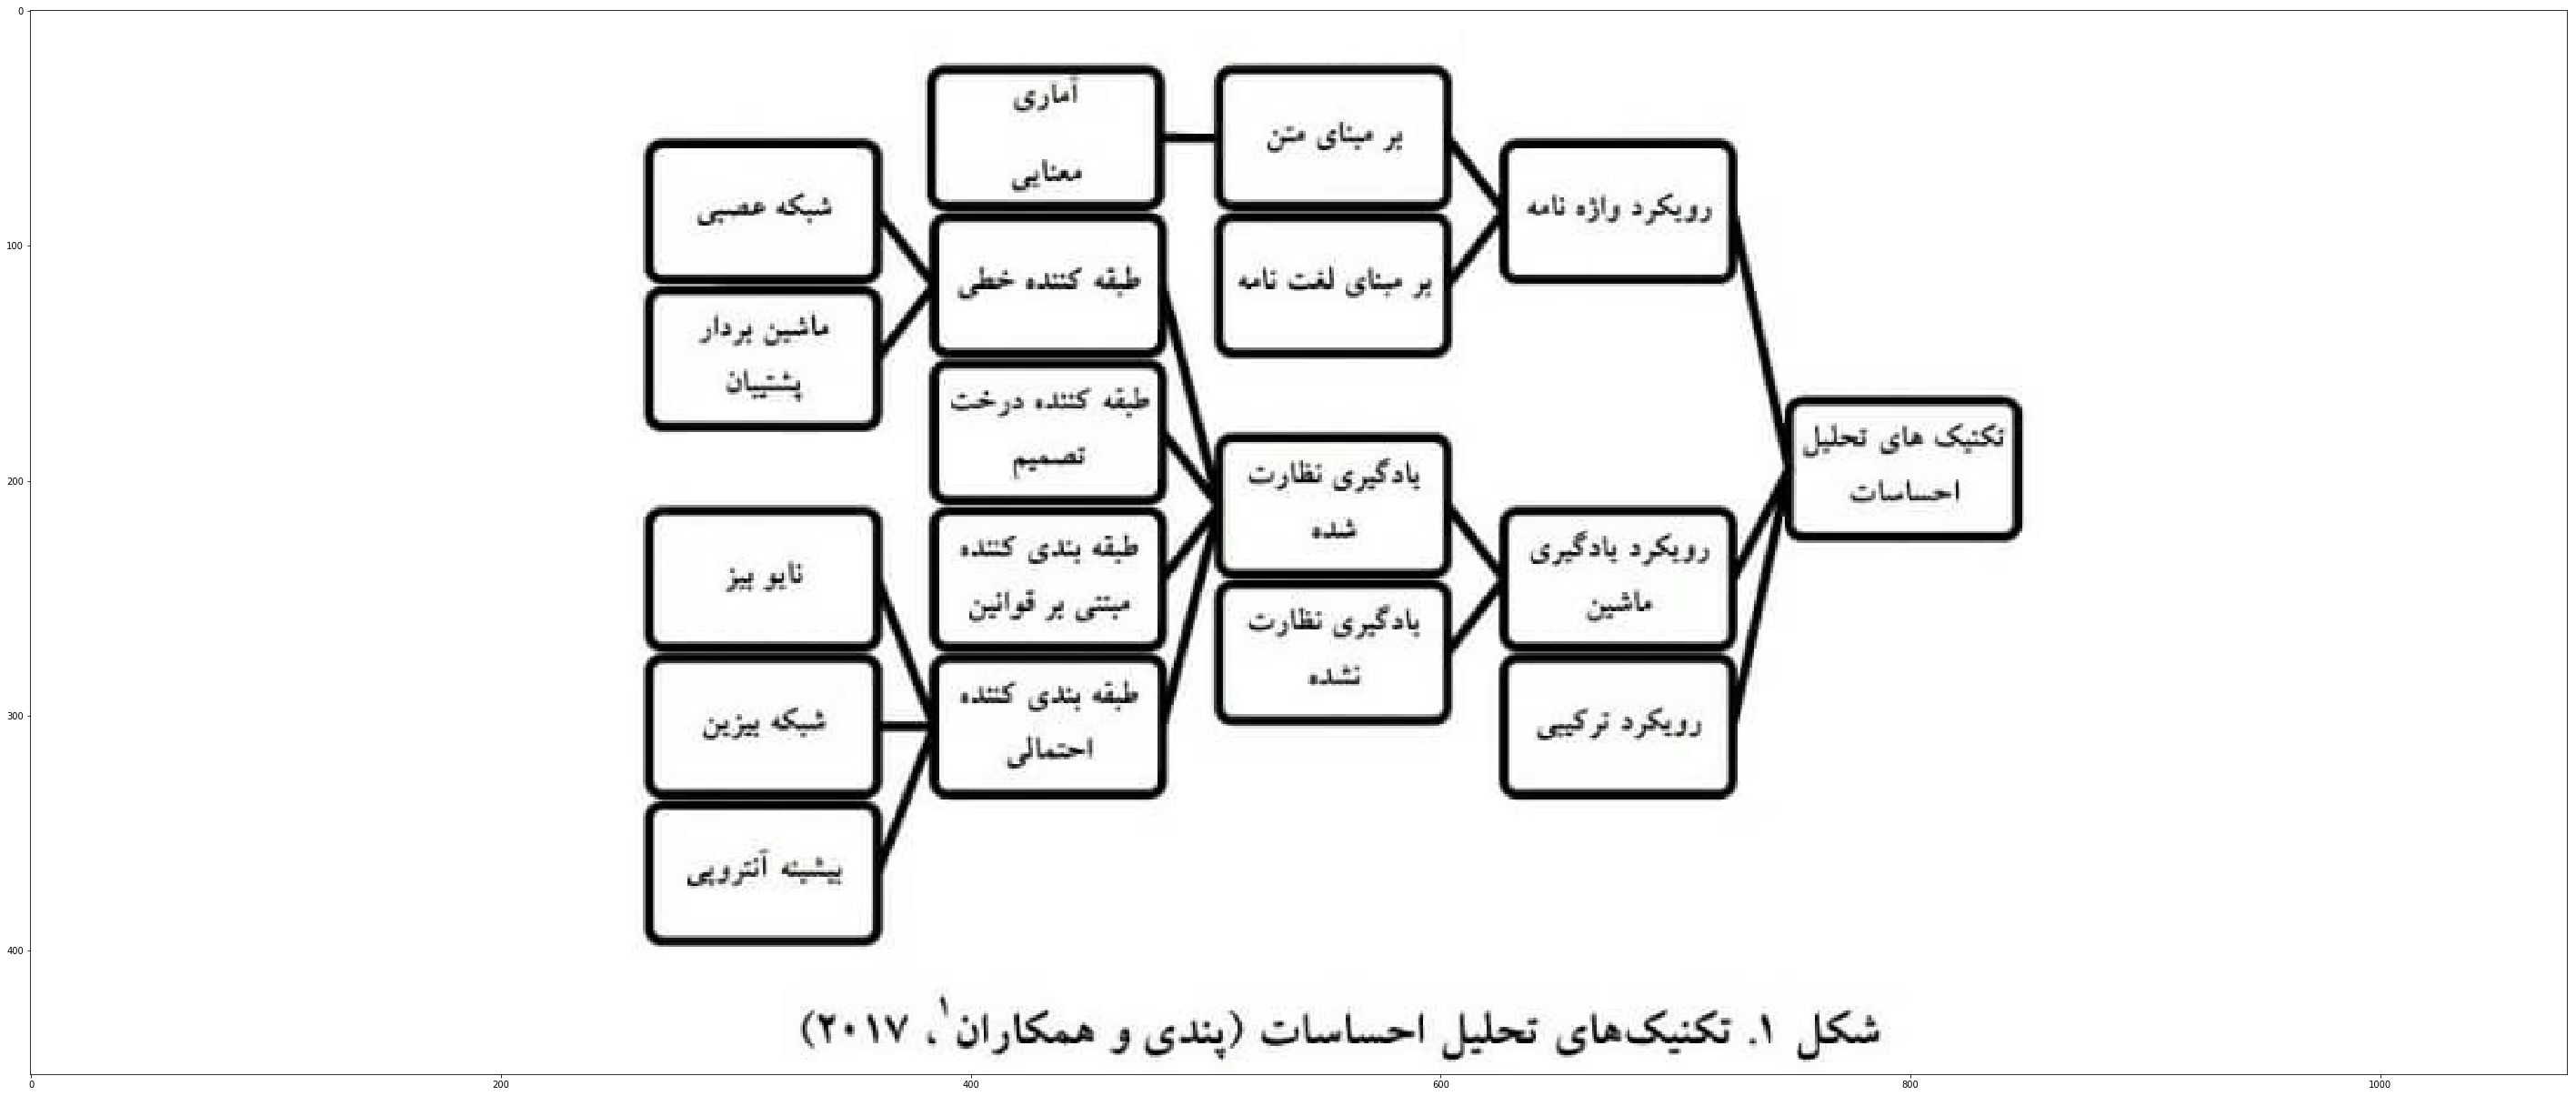

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = plt.imread('image1.jpg')
plt.figure(figsize=(50,40))
plt.imshow(image)

#  خواندن داده

In [3]:
# در ابتدا ترین دیتا خوانده می شود و به دولوپ و ترین تقسم می شوندو بر اساس دولوپ طبقه بندها ارزیاب می شوندو بهترین ارزایاب انتخاب می شود و با داده های تست مورد ازمایش قرار می گیرد

In [4]:
dataset = pd.read_csv("labeledTrainData.tsv",delimiter="\t", quoting=3) 
print ("size:",dataset.shape)
print(dataset.head())

size: (25000, 3)
         id  sentiment                                             review
0  "5814_8"          1  "With all this stuff going down at the moment ...
1  "2381_9"          1  "\"The Classic War of the Worlds\" by Timothy ...
2  "7759_3"          0  "The film starts with a manager (Nicholas Bell...
3  "3630_4"          0  "It must be assumed that those who praised thi...
4  "9495_8"          1  "Superbly trashy and wondrously unpretentious ...


In [5]:
dataset['sentiment'].value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

# تجسم داده 

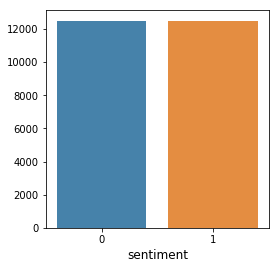

In [6]:
# import seaborn as sns

p = dataset['sentiment'].value_counts()

plt.figure(figsize=(4,4))
sns.barplot(p.index, p.values, alpha=0.9)# میزان شفافیت رنگ
# plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('sentiment', fontsize=12)
plt.show()

#  train و dev تقسیم بندی دیتاست به 


In [7]:
train,dev = train_test_split(dataset, test_size=0.2, random_state=42)
train=train.reset_index()
dev=dev.reset_index()
print ("size_train:",train.shape)
print ("size_dev:",dev.shape)

size_train: (20000, 4)
size_dev: (5000, 4)


# پاکسازی متن

In [8]:
def review_to_words( raw_review ):

    review_text = BeautifulSoup(raw_review).get_text() 
      
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 

    words = letters_only.lower().split()                             

    stops = set(stopwords.words("english"))                  

    meaningful_words = [w for w in words if not w in stops]   

    return( " ".join( meaningful_words ))

#  train , dev پاکسازی

In [9]:
num_reviews_train = train["review"].size
num_reviews_dev = dev["review"].size

clean_train_reviews= []
clean_dev_reviews = []

for i in range( num_reviews_train ):

    clean_train_reviews.append( review_to_words( train["review"][i] ) )

for i in range( num_reviews_dev  ):

    clean_dev_reviews.append( review_to_words( dev["review"][i] ) )

In [10]:
clean_train_reviews

['movie plain dumb casting ralph meeker mike hammer fatuous climax film exercise wooden predictability mike hammer one detective fiction true sociopaths unlike marlow spade put pieces together solve mystery hammer breaks things apart get truth film turns hammer boob surrounding bad guys well dumb get away anything one poorly drawn succumbs popcorn attack parts movie right three stooges play book velda dance barre instance bad guy accidentally stabs boss back continuity breaks shameful frau blucher running centerline road camera tight lower legs way side camera pulls back wider shot worst break however precedes popcorn attack bad guy stalking hammer passes clock seconds hero except clock shows seven minutes behind guy fair interesting camera angles lighting grand finale bad must seen reason gets two points',
 'dahmer young confused man dahmer confusing movie granted beers watching movie explain got bored flick flashbacks nothing confusing annoying real storyline beginning end thing made

# دیتا به بردار  train & dev تبدل نمودن نظرات مخاطبین در  

In [11]:
print ("Creating the bag of words...\n")
vectorizer = CountVectorizer(analyzer = "word",max_features = 5000,max_df=0.01,ngram_range=(1, 2)) 
train_data_features_B = vectorizer.fit_transform(clean_train_reviews)
train_data_features_BOW = train_data_features_B.toarray()
dev_data_features_B = vectorizer.transform(clean_dev_reviews)
dev_data_features_BOW = dev_data_features_B.toarray()
lable_dev = np.array(dev['sentiment'])

Creating the bag of words...



In [20]:
print ("Creating the Tfidf ...\n")
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer = "word",max_features = 5000,max_df=0.01,ngram_range=(1, 2)) 
train_data_features=vectorizer.fit_transform(clean_train_reviews)
dev_data_features=vectorizer.transform(clean_dev_reviews)
lable_dev = np.array(dev['sentiment'])

Creating the Tfidf ...



In [13]:
# https://stats.stackexchange.com/questions/154660/tfidfvectorizer-should-it-be-used-on-train-only-or-traintest
# برای تست نباید ای دی اف حساب بشه

# رویکرد یادگیری ماشین-یادگیری نظارت شده 

# 1- RandomForestClassifier

In [16]:
forest = RandomForestClassifier(n_estimators = 30) 
forest = forest.fit( train_data_features_BOW, train["sentiment"] )
# پیش بینی
result_forest = forest.predict(dev_data_features_BOW)

# سنجش میزان دقت 
D_forest = precision_recall_fscore_support(lable_dev, result_forest, average='macro')
print('RandomForest Classifier_BOW :', '  **P=',D_forest[0], '   **R=',D_forest[1],'   **F=', D_forest[2])

RandomForest Classifier_BOW :   **P= 0.7768308943023534    **R= 0.7732489828612501    **F= 0.7721551443758182


In [14]:
forest = RandomForestClassifier(n_estimators = 100)   
forest = forest.fit( train_data_features, train["sentiment"] )
# پیش بینی
result_forest = forest.predict(dev_data_features)

# سنجش میزان دقت 
D_forest = precision_recall_fscore_support(lable_dev, result_forest, average='macro')
print('RandomForest Classifier_TFIDF :', '  **P=',D_forest[0], '   **R=',D_forest[1],'   **F=', D_forest[2])

RandomForest Classifier_TFIDF :   **P= 0.7840181952026851    **R= 0.7824959969687849    **F= 0.7819625572248178


In [22]:
forest = RandomForestClassifier(n_estimators = 40)   
forest = forest.fit( train_data_features, train["sentiment"] )
# پیش بینی
result_forest = forest.predict(dev_data_features)

# سنجش میزان دقت 
D_forest = precision_recall_fscore_support(lable_dev, result_forest, average='macro')
print('RandomForest Classifier_TFIDF :', '  **P=',D_forest[0], '   **R=',D_forest[1],'   **F=', D_forest[2])

RandomForest Classifier_TFIDF :   **P= 0.786115352652865    **R= 0.7843189022597945    **F= 0.7837197007321488


# 2- ExtraTrees

In [15]:
ExtraTrees = ExtraTreesClassifier() 
ExtraTrees.fit(train_data_features_BOW, train["sentiment"] ) 
result_ExtraTrees = ExtraTrees.predict(dev_data_features_BOW) 
D_ExtraTrees = precision_recall_fscore_support(lable_dev, result_ExtraTrees, average='macro')
print('ExtraTrees Classifier_BOW :','  **P=',D_ExtraTrees [0], '   **R=',D_ExtraTrees [1],'   **F=', D_ExtraTrees [2])

C:\Users\5920350\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTrees Classifier_BOW :   **P= 0.7673176213341764    **R= 0.761382057427637    **F= 0.7595949359597896


In [23]:
ExtraTrees = ExtraTreesClassifier() 
ExtraTrees.fit(train_data_features, train["sentiment"] ) 
result_ExtraTrees = ExtraTrees.predict(dev_data_features) 
D_ExtraTrees = precision_recall_fscore_support(lable_dev, result_ExtraTrees, average='macro')
print('ExtraTrees Classifier_TFIDF :', '  **P=',D_ExtraTrees [0], '   **R=',D_ExtraTrees [1],'   **F=', D_ExtraTrees [2])

C:\Users\5920350\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTrees Classifier_TFIDF :   **P= 0.7796934004934448    **R= 0.7718525822051482    **F= 0.7697262479871176


# 3- LinearSVC

In [24]:
SVC = LinearSVC(C=2.5, penalty="l2", dual=False ,tol=0.0025).fit(train_data_features_BOW, train["sentiment"] )
result_SVC = SVC.predict(dev_data_features_BOW)
D_SVC = precision_recall_fscore_support(lable_dev, result_SVC, average='macro')
print('SVM Classifier_BOW :', '  **P=',D_SVC [0], '   **R=',D_SVC [1],'   **F=', D_SVC [2])

SVM Classifier_BOW :   **P= 0.7736978491132295    **R= 0.7736659669462508    **F= 0.7735982250100841


In [25]:
SVC = LinearSVC(C=2.5, penalty="l2", dual=False ,tol=0.0025).fit(train_data_features, train["sentiment"] )
result_SVC = SVC.predict(dev_data_features)
D_SVC = precision_recall_fscore_support(lable_dev, result_SVC, average='macro')
print('SVM Classifier_TFIDF :', '  **P=',D_SVC [0], '   **R=',D_SVC [1],'   **F=', D_SVC [2])

SVM Classifier_TFIDF :   **P= 0.8015902286093628    **R= 0.8016037406320589    **F= 0.8015937779808775


# 4- NB

In [19]:

NB.fit(train_data_features_BOW, train["sentiment"] )
result_NB = NB.predict(dev_data_features_BOW)
D_NB = precision_recall_fscore_support(lable_dev, result_NB, average='macro')
print('NB Classifier_BOW :', '  **P=',D_NB [0], '   **R=',D_NB [1],'   **F=', D_NB [2])

NB Classifier_BOW :   **P= 0.7708697668256492    **R= 0.761714316618928    **F= 0.7591261847817012


In [20]:
# در اینجا ورودی حتما باید ارایه باشد
train_data_featuresNB=train_data_features.toarray()
dev_data_featuresNB=dev_data_features.toarray()
NB =GaussianNB()
NB.fit(train_data_featuresNB, train["sentiment"] )
result_NB = NB.predict(dev_data_featuresNB)
D_NB = precision_recall_fscore_support(lable_dev, result_NB, average='macro')
print('NB Classifier :', '  **P=',D_NB [0], '   **R=',D_NB [1],'   **F=', D_NB [2])

NB Classifier :   **P= 0.7898489503328213    **R= 0.7898471415708971    **F= 0.7897999915919997


In [51]:
#  به کارگیری ان گرتم دوتایی مقادیر پاسخ را بهبود چشمگیری می دهد خصوصا در بگ اف ورد 
#  استفاده از تی اف ای دی اف هم نتایج بهتری دارد و هم زمان اجرای کمتری 

## **** انتخاب می شود   ،  LinearSVC   با توجه به جواب های بهتر 

# رویکرد واژه نامه _برمبنای متن-آماری و معنایی

# جهت رویکرد واژه   train و dev تقسیم بندی دیتاست به 


In [21]:
train_w,dev_w= train_test_split(dataset, test_size=0.2, random_state=42)
train_w=train_w.reset_index()
dev_w=dev_w.reset_index()
print ("size_train:",train_w.shape)
print ("size_dev:",dev_w.shape)


size_train: (20000, 4)
size_dev: (5000, 4)


In [7]:
eng_stopwords = set(stopwords.words("english"))

## Meta features 


In [22]:
## 1-Number of words in the text
train_w ["num_words"] = train_w ["review"].apply (lambda x: len(str(x).split()))
dev_w ["num_words"] = dev_w ["review"].apply (lambda x: len(str(x).split()))

## 2-Number of unique words in the text        
train_w ["num_unique_words"] = train_w ["review"].apply (lambda x : len(set(str(x).split())))
dev_w ["num_unique_words"] = dev_w ["review"].apply (lambda x : len (set(str(x).split())))

## 3-Number of characters in the text ##
train_w["num_chars"] = train_w["review"].apply (lambda x : len(str(x)))
dev_w["num_chars"] = dev_w["review"].apply (lambda x : len(str(x)))


## 4-Number of stopwords in the text ##
train_w["num_stopword"] = train_w["review"].apply ( lambda x : len([w for w in str(x).lower().split() if w in eng_stopwords]))
dev_w["num_stopword"] = dev_w["review"].apply (lambda x : len ([w for w in str(x).lower().split() if w in eng_stopwords]))

## 5-Number of punctuations in the text ##
train_w["num_punctuation"]= train_w["review"].apply (lambda x : len ([c for c in str(x) if c in string.punctuation]))
dev_w["num_punctuation"]=dev_w["review"].apply (lambda x : len ([c for c in str(x) if c in string.punctuation] ))

## 6-Number of title case words in the text ##
train_w["num_upper"]=train_w["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
dev_w["num_upper"]=dev_w["review"].apply (lambda x : len([w for w in str(x).split() if w.isupper]))


## 7-Number of title case words in the text ##
train_w["num_title"]=train_w["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
dev_w["num_title"]=dev_w["review"].apply (lambda x : len([w for w in str(x).split() if w.istitle]))


## 8-Average length of the words in the text ##
train_w["mean_word_len"] = train_w["review"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
dev_w ["mean_word_len"] = dev_w["review"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))


In [33]:
train_w.head(5)

,index,id,sentiment,review,num_words,num_unique_words,num_chars,num_stopword,num_punctuation,num_upper,num_title,mean_word_len
0,23311,"""10338_2""",0,"""This movie is just plain dumb.<br /><br />Fro...",80,161,1308,80,57,0,25,4.523207
1,23623,"""11068_4""",0,"""Dahmer, a young confused man. Dahmer, a confu...",80,125,991,80,75,4,12,4.541899
2,1020,"""4974_2""",0,"""May the saints preserve us, because this movi...",80,127,1001,78,63,2,24,4.661017
3,12645,"""586_10""",1,"""The combination of reading the Novella and vi...",80,273,2436,80,80,16,44,4.788599
4,1533,"""4552_9""",1,"""Daniel Day Lewis in My Left Foot gives us one...",78,64,433,33,10,1,19,4.564103


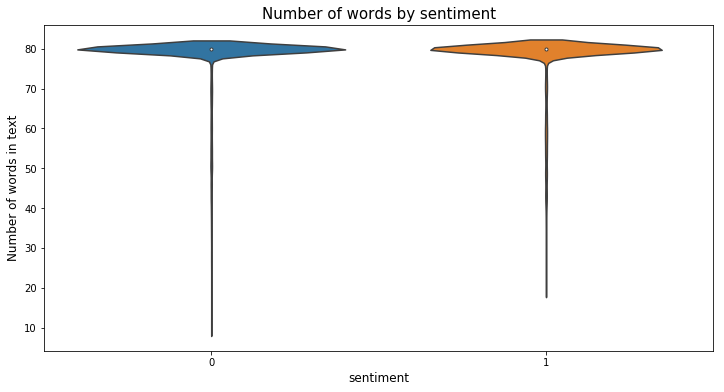

In [27]:
import seaborn as sns
#train_w['num_words'].loc[train_w['num_words']>80] = 80 #truncation for better visuals
plt.figure(figsize=(12,6))
sns.violinplot(x='sentiment', y='num_words', data=train_w)
plt.xlabel('sentiment', fontsize=12)
plt.ylabel('Number of words in text', fontsize=12)
plt.title("Number of words by sentiment", fontsize=15)
plt.show()

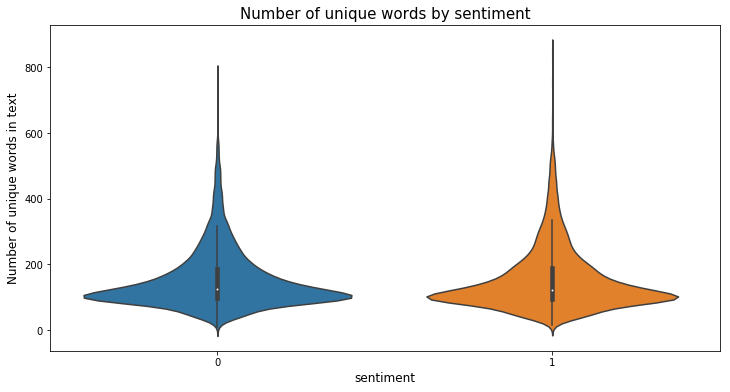

In [28]:
train_w['num_words'].loc[train_w['num_words']>80] = 80 #truncation for better visuals
plt.figure(figsize=(12,6))
sns.violinplot(x='sentiment', y='num_unique_words', data=train_w)
plt.xlabel('sentiment', fontsize=12)
plt.ylabel('Number of unique words in text', fontsize=12)
plt.title("Number of unique words by sentiment", fontsize=15)
plt.show()

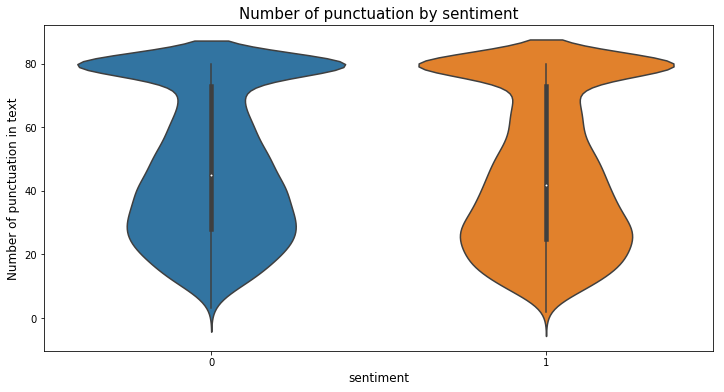

In [12]:
train_w['num_punctuation'].loc[train_w['num_punctuation']>80] = 80 #truncation for better visuals
plt.figure(figsize=(12,6))
sns.violinplot(x='sentiment', y='num_punctuation', data=train_w)
plt.xlabel('sentiment', fontsize=12)
plt.ylabel('Number of punctuation in text', fontsize=12)
plt.title("Number of punctuation by sentiment", fontsize=15)
plt.show()

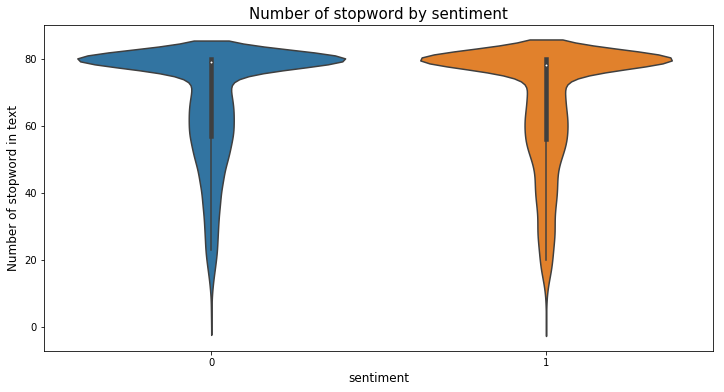

In [29]:
train_w['num_stopword'].loc[train_w['num_stopword']>80] = 80 #truncation for better visuals
plt.figure(figsize=(12,6))
sns.violinplot(x='sentiment', y='num_stopword', data=train_w)
plt.xlabel('sentiment', fontsize=12)
plt.ylabel('Number of stopword in text', fontsize=12)
plt.title("Number of stopword by sentiment", fontsize=15)
plt.show()

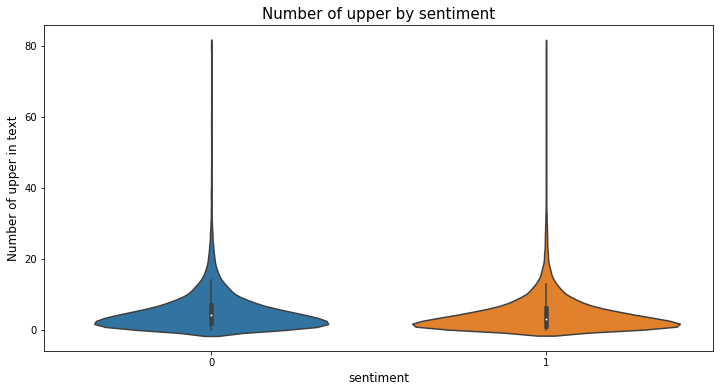

In [30]:
train_w['num_upper'].loc[train_w['num_upper']>80] = 80 #truncation for better visuals
plt.figure(figsize=(12,6))
sns.violinplot(x='sentiment', y='num_upper', data=train_w)
plt.xlabel('sentiment', fontsize=12)
plt.ylabel('Number of upper in text', fontsize=12)
plt.title("Number of upper by sentiment", fontsize=15)
plt.show()

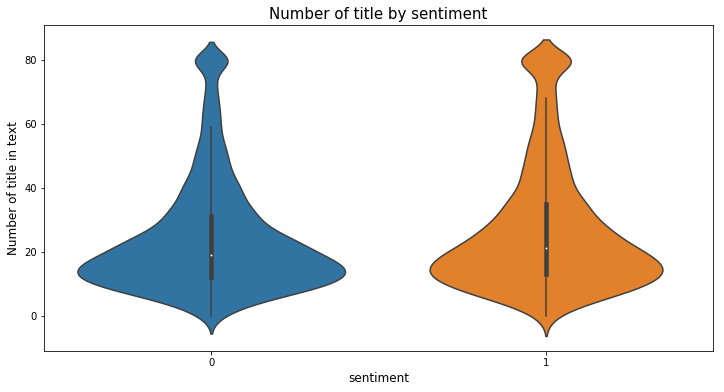

In [31]:
train_w['num_title'].loc[train_w['num_title']>80] = 80 #truncation for better visuals
plt.figure(figsize=(12,6))
sns.violinplot(x='sentiment', y='num_title', data=train_w)
plt.xlabel('sentiment', fontsize=12)
plt.ylabel('Number of title in text', fontsize=12)
plt.title("Number of title by sentiment", fontsize=15)
plt.show()

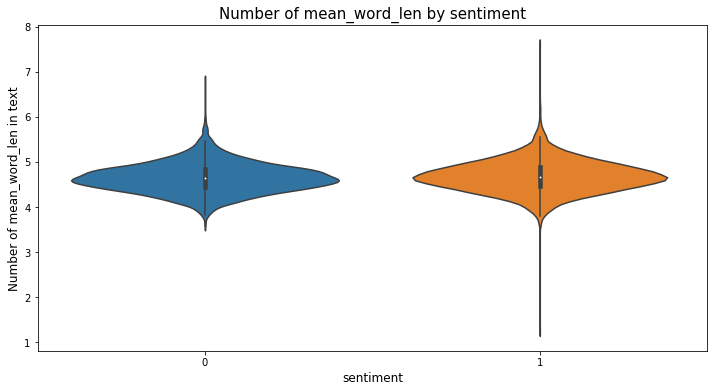

In [32]:
train_w['mean_word_len'].loc[train_w['mean_word_len']>80] = 80 #truncation for better visuals
plt.figure(figsize=(12,6))
sns.violinplot(x='sentiment', y='mean_word_len', data=train_w)
plt.xlabel('sentiment', fontsize=12)
plt.ylabel('Number of mean_word_len in text', fontsize=12)
plt.title("Number of mean_word_len by sentiment", fontsize=15)
plt.show()

In [17]:
train_w.head()
dev_w.head()

,index,id,sentiment,review,num_words,num_unique_words,num_chars,num_stopword,num_punctuation,num_upper,num_title,mean_word_len
0,6868,"""2570_3""",0,"""I read that \""There's a Girl in My Soup\"" cam...",107,94,637,40,33,107,107,4.962617
1,24016,"""4897_8""",1,"""This film pulls you in from the get-go becaus...",288,196,1651,126,74,288,288,4.736111
2,9668,"""8485_3""",0,"""From the awful death scenes to guns that fire...",130,99,749,58,14,130,130,4.769231
3,13640,"""9029_10""",1,"""I saw that movie few days ago. This movie is ...",74,54,387,36,8,74,74,4.243243
4,14018,"""11220_1""",0,"""For a film with so much promise it was disapp...",128,89,666,64,17,128,128,4.210938


In [35]:
## Prepare the data for modeling ###
# sentiment_mapping_dict = {'EAP':0, 'HPL':1, 'MWS':2}
# train_y = train_w['sentiment'].map(sentiment_mapping_dict)
train_y = train_w['sentiment']
train_id = train_w['id'].values
dev_id = dev_w['id'].values

## recompute the trauncated variables again ###
# train_w["num_words"] = train_w["review"].apply(lambda x: len(str(x).split()))
# dev_w["num_words"] = dev_w["review"].apply(lambda x: len(str(x).split()))
# train_w["mean_word_len"] = train_w["review"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
# dev_w["mean_word_len"] = dev_w["review"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

cols_to_drop = ['id', 'review']
train_X = train_w.drop(cols_to_drop+['sentiment'], axis=1)
dev_x = dev_w.drop(cols_to_drop+['sentiment'], axis=1)

In [22]:
train_X.shape,dev_x.shape

((20000, 8), (5000, 8))

In [36]:
train_X.iloc[5:6]

,index,num_words,num_unique_words,num_chars,num_stopword,num_punctuation,num_upper,num_title,mean_word_len
5,3518,80,242,2073,80,95,1,26,5.1


In [37]:
dev_x[5:6]

,index,num_words,num_unique_words,num_chars,num_stopword,num_punctuation,num_upper,num_title,mean_word_len
5,7488,139,106,773,64,44,139,139,4.568345


In [25]:
len(dev_x)

5000

In [26]:
lable_dev_w = np.array(dev_w['sentiment'])
NB.fit(train_X, train_w["sentiment"] )
result_NB_w = NB.predict(dev_x)
DD_NB = precision_recall_fscore_support(lable_dev_w, result_NB_w, average='macro')
print('NB Classifier_W :', '  **P=',DD_NB [0], '   **R=',DD_NB [1],'   **F=', DD_NB [2])

NB Classifier_W :   **P= 0.2481    **R= 0.5    **F= 0.331640155059484


C:\Users\5920350\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [27]:
SVC = LinearSVC(C=2.5, penalty="l2", dual=False ,tol=0.0025).fit(train_X, train_w["sentiment"] )
result_SVC = SVC.predict(dev_x)
D_SVC = precision_recall_fscore_support(lable_dev_w, result_SVC, average='macro')
print('SVM Classifier_TFIDF :', '  **P=',D_SVC [0], '   **R=',D_SVC [1],'   **F=', D_SVC [2])

SVM Classifier_TFIDF :   **P= 0.5019007603041217    **R= 0.5000030401756006    **F= 0.3353767974226871


In [28]:
def runXGB(train_X, train_y, test_X, test_y=None, test_X2=None, seed_val=0, child=1, colsample=0.3):
    param = {}
    param['objective'] = 'multi:softprob'
    param['eta'] = 0.1
    param['max_depth'] = 3
    param['silent'] = 1
    param['num_class'] = 3
    param['eval_metric'] = "mlogloss"
    param['min_child_weight'] = child
    param['subsample'] = 0.8
    param['colsample_bytree'] = colsample
    param['seed'] = seed_val
    num_rounds = 2000

    plst = list(param.items())
    xgtrain = xgb.DMatrix(train_X, label=train_y)

    if test_y is not None:
        xgtest = xgb.DMatrix(test_X, label=test_y)
        watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
        model = xgb.train(plst, xgtrain, num_rounds, watchlist, early_stopping_rounds=50, verbose_eval=20)
    else:
        xgtest = xgb.DMatrix(test_X)
        model = xgb.train(plst, xgtrain, num_rounds)

    pred_test_y = model.predict(xgtest, ntree_limit = model.best_ntree_limit)
    if test_X2 is not None:
        xgtest2 = xgb.DMatrix(test_X2)
        pred_test_y2 = model.predict(xgtest2, ntree_limit = model.best_ntree_limit)
    return pred_test_y, pred_test_y2, model

In [29]:
import xgboost as xgb

from sklearn import ensemble, metrics, model_selection, naive_bayes


In [30]:
val_y.shape,pred_val_y.shape

((4000,), (4000, 3))

In [31]:
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2017)
cv_scores = []
pred_full_test = 0
pred_train = np.zeros([train_w.shape[0], 3])
for dev_index, val_index in kf.split(train_X):
    dev_X, val_X = train_X.loc[dev_index], train_X.loc[val_index]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    pred_val_y, pred_test_y, model = runXGB(dev_X, dev_y, val_X, val_y, dev_x, seed_val=0)
    pred_full_test = pred_full_test + pred_test_y
    pred_train[val_index,:] = pred_val_y
    cv_scores.append(metrics.log_loss(val_y, pred_val_y))
#     break
print("cv scores : ", cv_scores)

[0]	train-mlogloss:1.06056	test-mlogloss:1.06107
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 50 rounds.


C:\Users\5920350\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20]	train-mlogloss:0.765475	test-mlogloss:0.77132
[40]	train-mlogloss:0.697925	test-mlogloss:0.708885
[60]	train-mlogloss:0.673191	test-mlogloss:0.687863
[80]	train-mlogloss:0.661819	test-mlogloss:0.679876
[100]	train-mlogloss:0.655048	test-mlogloss:0.676295
[120]	train-mlogloss:0.65062	test-mlogloss:0.675161
[140]	train-mlogloss:0.646933	test-mlogloss:0.67419
[160]	train-mlogloss:0.644032	test-mlogloss:0.673856
[180]	train-mlogloss:0.64125	test-mlogloss:0.674032
[200]	train-mlogloss:0.638591	test-mlogloss:0.673723
[220]	train-mlogloss:0.636097	test-mlogloss:0.673306
[240]	train-mlogloss:0.633745	test-mlogloss:0.673382
[260]	train-mlogloss:0.63166	test-mlogloss:0.673513
Stopping. Best iteration:
[227]	train-mlogloss:0.635235	test-mlogloss:0.673258



ValueError: y_true and y_pred contain different number of classes 2, 3. Please provide the true labels explicitly through the labels argument. Classes found in y_true: [0 1]

In [29]:
output = pd.DataFrame( data={"id":test["id"], "sentiment":result} )

output.to_csv( "Bag_of_Words_model.csv", index=False )

In [27]:
output

,id,sentiment
0,"""12311_10""",1
1,"""8348_2""",0
2,"""5828_4""",1
3,"""7186_2""",1
4,"""12128_7""",1
5,"""2913_8""",1
6,"""4396_1""",0
7,"""395_2""",0
8,"""10616_1""",0
9,"""9074_9""",1
